# 파이썬 머신러닝 완벽 가이드  


# 4. 분류

## 183p

## 다양한 머신러닝 분류 알고리즘

* 베이즈 통계와 생성 모델에 기반한 나이브 베이즈
* 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀
* 데이터 균일도에 따른 규칙 기반의 결정 트리
* 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신
* 근접 거리를 기준으로 하는 최소 근접 알고리즘
* 심층 연결 기반의 신경망
* 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블  

  
  
**정형 데이터의 예측 분석 영역에서는 앙상블이 높은 예측 성능으로 분석가들에게 애용되고 있다.**

### 앙상블  
  
**앙상블에는 배깅과 부스팅, 그리고 앙상블의 앙상블이라고 불리는 스태킹 기법이 있다.**

## 결정 트리

결정 트리는 매우 쉽고 유연하게 적용될 수 있는 알고리즘이다.
데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적다.
  
하지만 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합 문제가 발생하여 성능이 떨어지는 단점이 있다.

많은 규칙이 있다는 것은 곧 분류를 결정하는 방식이 더욱 복잡해진다는 것이고 이는 모델을 쓸데없이 복잡하게 만들어 과적합으로 직결되게 한다.  

즉, 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다.

결정 트리는 분할된 노드의 정보의 균일도를 기준으로 트리를 분할하는데 대표적인 측정 방식으로는 **엔트로피를 이용한 정보 이득 지수**와 **지니 계수**가 있다.  

사이킷런의 **DecisionTreeClassifier** 는 기본으로 지니 계수를 이용해 데이터 세트를 분할한다.

### 결정 트리의 장점
* 쉽다, 직관적이다
* 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않다.

### 결정 트리의 단점
* 과적합으로 알고리즘 성능이 떨어진다. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝이 필요하다.

## 결정 트리 파라미터

사이킷런의 결정 트리 구현은 CART(Classification And Regression Trees)알고리즘 기반이며 분류, 회귀 모두에서 사용 가능하다.

분류의 DecisionTreeClassifier, 회귀의 DecisionTreeRegressor 모두 파라미터는 다음과 같이 동일한 파라미터를 사용한다.

* **min_samples_split**
    * 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용됨.
    * 디폴트는 2이고, 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
    * 과적합을 제어, 1로 설정할 경우 분할되는 노드가 많아져서 과적합 가능성 증가
      
      
* **min_samples_leaf**
    * 말단 노드(리프노드)가 되기 위한 최소한의 샘플 데이터 수
    * min_samples_split과 유사하게 과적합 제어 용도, 그러나 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요.
    
    
* **max_features**
    * 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행.
    * int 형으로 지정하면 대상 피처의 개수, float형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임
    * 'sqrt' 는 전체 피처 중 전체 피처 수의 제곱근 수 만큼 선정
    * 'log' 는 전체 피처 중 전체 피처 수의 log2(N) 값 만큼 선정
    * 'None' 은 전체 피처 선정
    
    
* **max_depth**
    * 트리의 최대 깊이를 규정
    * 디폴트는 None이며 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킴
    * 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요
    
    
* **max_leaf_nodes**
    * 말단 노드의 최대 개수

## 결정 트리의 시각화(graphviz)


* 콘솔에서 pip install graphviz 명령어로 설치

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

**사이킷런의 트리 모듈은 export_graphviz() 함수를 제공함**
함수 안에 학습이 완료된 estimator, output 파일 명, 결정 클래스의 명칭, 피쳐의 명칭을 입력해 주면 됨

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

In [ ]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 간단한 해석

* petal length <= 2.45 : 자식 노드를 만들기 위한 규칙 조건. 이 조건이 없으면 리프 노드임
* gini: value=[] 데이터 분포에서의 지니 계수
* samples : 현 규칙에 해당하는 데이터 건수
* value: [] : 클래스 값 기반의 데이터 건수. 
* 각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미. 색이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미

**결정트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건임.**  


**중요한 피처를 골라내는 것이 매우 중요하고 이상치에 강한 모델을 만들 수 있음**

## Feature_importance

**사이킷런은 피처의 중요도 지표를 DecisionTreeClassifier 객체의 feature_importances_ 속성으로 제공함**

feature importances 속성을 가져와 피처별로 중요도 값을 매핑하고 막대그래프로 표현

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

## 결정트리 과적합(Overfitting) 시각화


**결론은 depth 를 줄이거나 min_samples_split 을 증가시켜 과적합 방지 튜닝을 해야 함**

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [ ]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [ ]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# 결정 트리 실습 - human activity recognition



* 사람에게 스마트 센서를 장착한 뒤 사람의 동작과 관련된 여러가지 피처를 수집한 데이터  


* 수집된 피처 데이터 세트를 기반으로 결정 트리를 이용해 어떠한 동작인지 예측하는 문제

* 인체의 움직임과 관련된 속성의 평균/표준편차가 X, Y, Z축 값으로 되어 있음

* 중복된 피처명이 존재하기 때문에 이를 변경해주는 코드가 추가로 필요

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])
feature_name_df.head(20)

### 중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
pd.options.display.max_rows = 999
new_feature_name_df = get_new_feature_name_df(feature_name_df)
new_feature_name_df[new_feature_name_df['dup_cnt'] > 0]

### 아래 get_human_dataset() 함수는 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df() 함수를 반영하여 수정

In [ ]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

In [ ]:
print(y_train['action'].value_counts())

In [ ]:
X_train.isna().sum().sum()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

### 결정 트리의 트리 깊이(depth)가 예측 정확도에 주는 영향 보기

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

### cv_results_

  
  
GridsearchCV 객체의 cv_results_ 속성은 CV 세트에 하이퍼 파라미터를 순차적으로 입력했을 때의 성능 수치를 가지고 있음

In [ ]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
# 사이킷런 버전이 업그레이드 되면서 아래의 GridSearchCV 객체의 cv_results_에서 mean_train_score는 더이상 제공되지 않습니다
# cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

In [ ]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

**이처럼 결정 트리는 깊이가 깊어질수록 과적합의 영향력이 커지므로 하이퍼 파라미터를 이용해 깊이를 제어할 수 있어야 한다**

### max_depth 와 min_samples_split을 같이 변경하면서 성능 튜닝

In [ ]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

### best_estimator_

**GridSearchCV 객체인 grid_cv의 속성인 best_estimators_는 최적 하이퍼 파라미터인 max_depth 8,  
min_samples_split 16 으로 학습이 완료된 Estimator 객체임.**

In [ ]:
best_df_clf = grid_cv.best_estimator_

pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

In [ ]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# 앙상블 학습

## 앙상블 학습 개요

* 앙상블 학습을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 말함

대표적인 앙상블 알고리즘으로는 다음이 있다.

* 랜덤포레스트
* 부스팅
    * 그래디언트 부스트
    * XGBoost
    * LightGBM
    * Catboost
* 스태킹(Stacking)

앙상블 학습의 유형은 전톡적으로  
* 보팅(Voting)
* 배깅(Bagging)
* 부스팅(Boosting)  

이 있으며, 이 외에도 스태깅을 포함한 다양한 앙상블 방법이 있다.

보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식이다.
보팅과 배깅의 다른 점은,  
**보팅**은 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고,  
**배깅**은 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것.  


대표적인 배깅 방식이 바로 랜덤 포레스트 알고리즘이다.

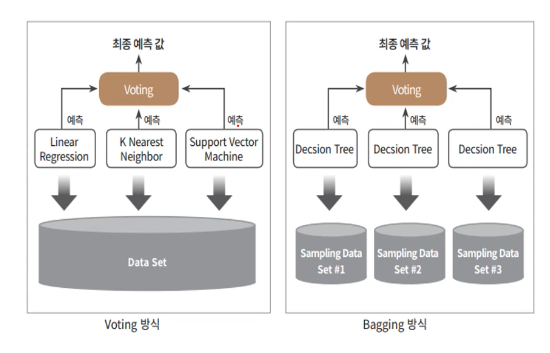

위 그림을 보면 왼쪽 그림은 보팅 분류기를 도식화한 것이며, 
선형 회귀, K 최근접 이웃, 서포트 벡터 머신이라는 3개의 ML 알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과를 선정하는 방식  

오른쪽 그림은 배깅 분류기를 도식화한 것이며, 단일 결정트리 알고리즘으로 여러 분류기가 학습으로 개별 예측을 하는데, 학습하는 데이터 세트가 보팅 방식과는 다르다.   
개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출하는데, 
이렇게 개별 Classifier에게 데이터를 샘플링 해서 추출하는 방식을 부트스트래핑(Bootstrapping) 분할 방식이라고 한다.

  
  
교차 검증(cv)이 데이터 세트간 중복을 허용하지 않음과 반대로 배깅 방식은 중첩을 허용함

부스팅은 여러 개의 분류기가 순차적으로 학습을 수행하되,
앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)를 부여하면서 학습과 예측을 진행하는 것임  

스태킹은 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법임

## 하드 보팅(Hard Voting) 과 소프트 보팅(Soft Voting)
**하드 보팅**의 경우 **각 분류기가 예측한 결과를 다수결로 최종 class로 결정**하는 방식이고,
**소프트 보팅의 경우 각 분류기가 예측한 확률을 평균하여 결정**하는 방식.

일반적으로는 하드 보팅보다는 소프트 보팅이 예측 성능이 상대적으로 우수하여 주로 사용됨. 사이킷런은 VotingClassifier 클래스를 통해 보팅을 지원함.

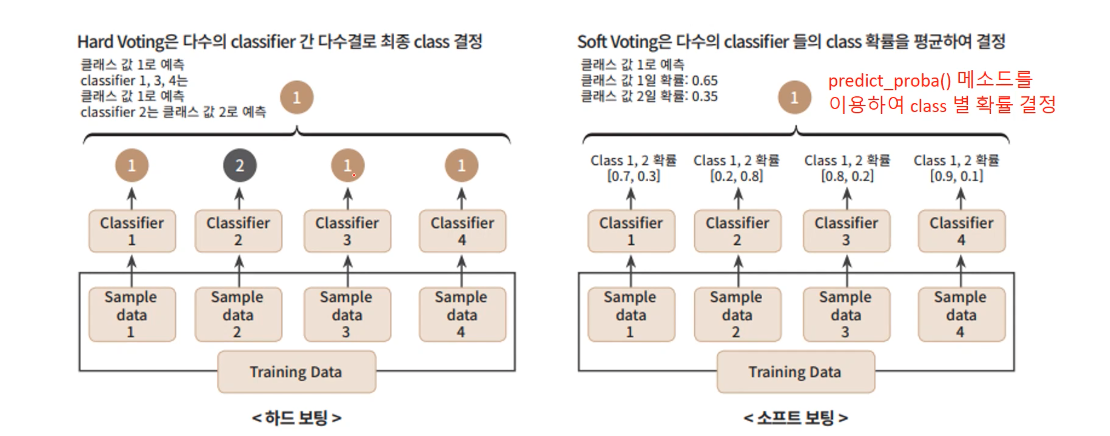

VotingClassifier 사용 예제

위스콘신 유방암 데이터 로드

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

**VotingClassifier로 개별모델은 로지스틱 회귀와 KNN을 보팅방식으로 결합하고 성능 비교**

In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 랜덤 포레스트

배깅은 보팅과는 다르게, 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘임
배깅의 대표 알고리즘이 랜덤 포레스트.

* 앙상블 알고리즘 중 비교적 따른 수행 속도를 가지고 있고 다양한 영역에서 높은 예측 성능을 보임
* 랜덤 포레스트의 기반 알고리즘은 결정 트리로서, 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음  

랜덤 포레스트는 여러개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측결정을 하는 모델임.

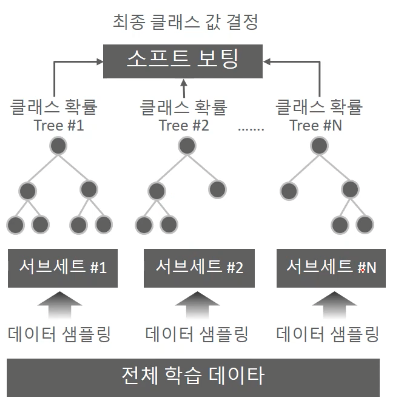

## 랜덤 포레스트의 부트스트래핑 분할

랜덤 포레스트는 여러개의 결정트리 분류기가 각자의 데이터를 샘플링 하여 학습한다고 하였습니다.

그 때 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑(bootstrappintg) 분할 방식이라고 합니다. 

배깅(Bagging) 의 뜻도 bootstrap aggregating에서 온 말입니다.

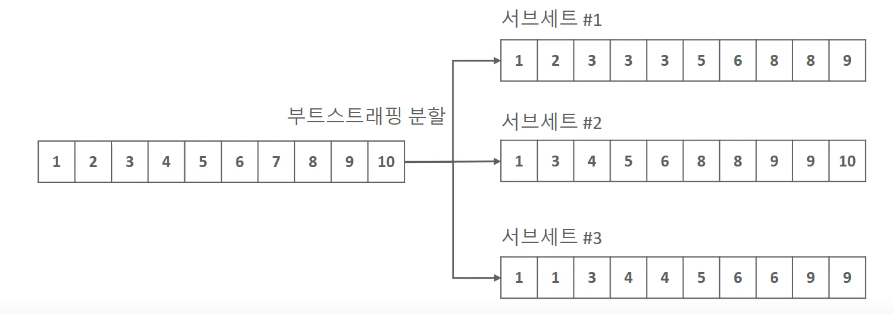

## 랜덤 포레스트 실습

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

## 랜덤 포레스트의 하이퍼 파라미터 튜닝

트리 기반의 앙상블 알고리즘의 단점을 굳이 뽑자면 하이퍼 파라미터가 너무 많고, 그로 인해서 튜닝을 위한 시간이 많이 소모된다는 것.

랜덤 포레스트는 그나마 적은 편에 속하는데, 결정 트리에서 사용하는 것과 같은 하이퍼 파라미터가 대부분이기 때문.


* **n_estimators**
    * 랜덤 포레스트에서 결정 트리의 개수를 지정한다. 디폴트 값은 10이며, 많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되는 것은 아님. 또한 늘릴수록 학습 수행 시간이 오래 걸리는 것 또한 감안해야함.

* **max_features**
    * 결정 트리에 사용된 max_features와 같으나, RandomForestClassifier의 기본 max_features는 'None' 이 아니고 'auto', 즉, 'sqrt' 와 같다. 따라서 랜덤 포레스트는 트리 분할시 참조하는 피처 개수가 전체 피처 개수의 제곱근 수 만큼 고려한다.
    
* **max_depth나 min_samples_leaf** 와 같이 결정 트리 파라미터들이 똑같이 랜포에도 적용 가능함.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

**튜닝된 하이퍼 파라미터로 재 학습 및 예측/평가**

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

**개별 feature들의 중요도 시각화**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# 부스팅

이번엔 부스팅이라는 앙상블의 유형을 알아보겠습니다.


부스팅 알고리즘은 여러 개의 약한 학습기(week learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식입니다.

부스팅의 대표적인 구현으로는 AdaBoost와 그래디언트 부스트 (Gradient Boost)가 있습니다.


에이다 부스팅의 학습/예측 프로세스 그림을 보며 부스팅 방식이 어떻게 학습하는지 대략적으로 살펴봅시다.

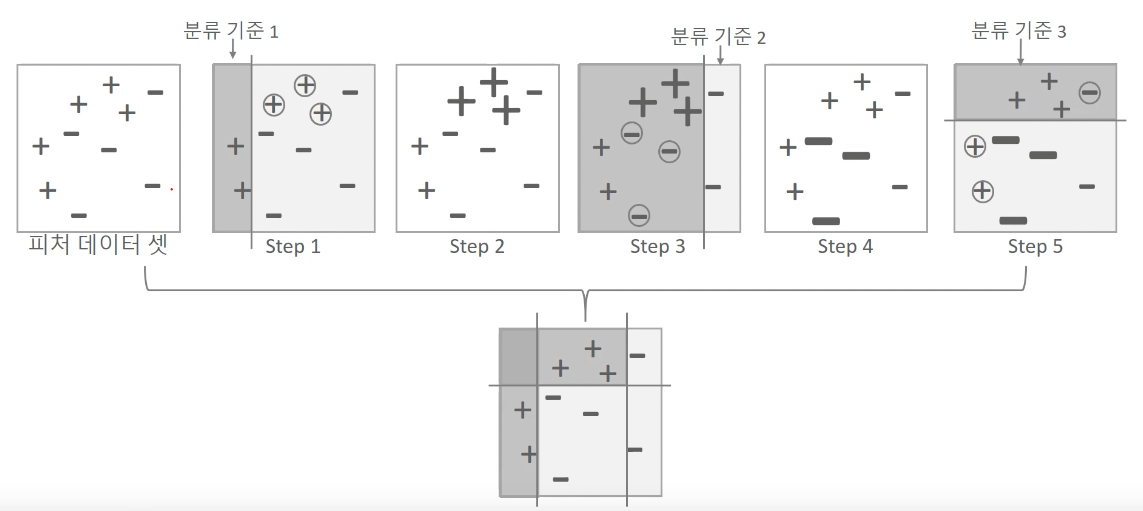

다음과 같이 하나의 약한 학습기가 학습-예측을 마치면 잘못 예근한 데이터에 가중치를 부여하면서 다음 약한 학습기가 이를 토대로 학습을 진행합니다. 

그리고 이 분류 1,2,3 을 예측한 결과는 약한 학습기 하나가 예측한 결과보다 훨씬 정교하게 예측되었음을 알 수 있습니다.

하지만 이 순차적으로 학습한다는 것에서 알 수 있듯이 다른 앙상블 기법에 비해 부스팅은 학습시간이 오래걸린다는 단점이 있습니다.

# GBM(Gradient Boosting Machine)

GBM은 에이다부스트와 윳하나, 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용하는 것이 큰 차이입니다.

분류의 결과값을 y, 피처를 X_1, X_2, X_3, ..., X_n


그리고 피처에 기반한 예측함수를 F(x)라고 하면 오류식 h(x)=y−F(x)가 됩니다.
 
 
이 오류식을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것이 경사하강법입니다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

**기본적인 정확도는 랜덤 포레스트보다 낫지만 수행 시간이 오래걸리고 튜닝 방법이 복잡하다는 단점이 있다.**

## GBM의 하이퍼 파라미터 튜닝

**n_estimators, max_depth, max_features와 같은 트리 기반 자체의 파라미터는 생략, 물론 튜닝 가능함**


* **loss**
    * 경사 하강법에서 사용할 비용함수를 지정합니다. 기본값은 'deviance'임
    
    
* **learning_rate**
    * GBM이 학습을 진행할 때 마다 적용하는 학습률. 0 ~ 1 사이의 값을 가지며 기본값은 0.1
    * 너무 작으면 최적 지점에 도달하지 못하고, 학습 속도가 느림
    * 너무 크면 최적 지점을 지나쳐버려 성능이 좋지 않음
    * 따라서 lr 은 n_estimators와 상호 보완적으로 조합해 사용함.
    * lr을 작게 하고, n_estimators를 크게 하면 더 이상 성능이 좋아지지 않는 한계점까지는 예측 성능이 조금씩 좋아질 수 있음. 하지만 현격히 좋아지는 것은 아님
    
    
* **n_estimators**
    * weak learner의 개수. 기본값은 100.
    
    
* **subsample**
    * 약한 학습기가 학습에 사용하는 데이터의 샘플링 비율.
    * 기본값은 1이며, 0.5면 전체 학습 데이터의 절반을 사용한다는 뜻
    * 과적합이 염려되는 경우 1보다 작은 0.8이나 0.9로 많이 설정함

### 튜닝 후 수행해보기

**시간이 매우 오래 걸림**

In [ ]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators':[100, 500],
#     'learning_rate' : [ 0.05, 0.1]
# }
# grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
# grid_cv.fit(X_train , y_train)
# print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
# print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# scores_df = pd.DataFrame(grid_cv.cv_results_)
# scores_df[['params', 'mean_test_score', 'rank_test_score',
# 'split0_test_score', 'split1_test_score']]

In [ ]:
# # GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
# gb_pred = grid_cv.best_estimator_.predict(X_test)
# gb_accuracy = accuracy_score(y_test, gb_pred)
# print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

* GBM은 과적합에도 강한 뛰어난 예측 성능을 가진 알고리즘이다.

* 하지만 수행 시간이 오래걸린다는 단점이 있다.

* 그래서 실제로는 GBM은 쓰이지 않고, 개량 버전인 XGBoost, LightGBM 등이 사용되고 있다.

# XGBoost(eXtra Gradient Boost)

XGBoost는 GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제를 해결하였다.

특히 XGBoost는 CPU 병렬 연산이 가능해 학습 수행 시간이 훨씬 빠르다.

### XGBoost의 장점

* 뛰어난 예측 성능
    * 일반적으로 분류와 회귀 영역에서 뛰어난 예측 성능을 발휘한다.


* GBM대비 빠른 수행 시간
    * XGBoost는 병렬 수행 및 다양한 기능으로 GBM에 비해 빠른 수행 성능을 보장한다. 하지만 GBM에 비해 빠르다는 것이지 다른 ML 알고리즘보다 더 빠르다는 의미는 아니다.


* 과적합 규제(Regulation)
    * 표준 GBM의 경우 과적합 규제 기능이 없으나, XGBoost는 자체에 과적합 규제 기능으로 과적합에 좀 더 강한 내구성을 지니고 있다.


* Tree pruning(가지치기)
    * 더 이상 긍정 이득이 없는 분할을 가지치기 해서 분할 수를 더 줄이는 추가적인 장점이 있다.


* 자체 내장된 교차 검증
    * XGBoost는 반복 수행 시마다 내부적으로 학습 데이터 세트와 평가 데이터 세트에 대한 교차 검증을 수행해 최적화된 반복 수행 횟수를 가질 수 있다.
    * 지정된 반복 횟수가 아니라 교차 검증을 통해 평가 데이터 세트의 평가 값이 최적화 되면 반복을 중간에 멈출 수 있는 조기 중단 기능이 있다.


* 결손값 자체 처리
    * missing value를 자체 처리할 수 있는 기능을 가지고 있다.

## XGBoost 설치

콘솔에 conda install -c anaconda py-xgboost 명령어로 설치

## XGBoost 하이퍼 파라미터

**파이썬 래퍼 XGBoost 하이퍼 파라미터** 와

**사이킷런 래퍼 XGBoost 하이퍼 파라미터** 가 있다.

파라미터의 명칭은 서로 약간씩 다른점이 있으나 기능은 별 차이가 없다.

우리가 주로 사용하는 것은 사이킷런 래퍼 하이퍼 파라미터이다.

* 주요 일반 파라미터  

    * **booster**: gbtree 또는 gblinear 선택. 디폴트는 gbtree  
    
    * **silent**: 디폴트는 0. 출력 메시지를 나타내고 싶지 않을 경우에는 1로 설정  
     
    * **nthread**: CPU의 실행 스레드 개수를 조정. 디폴트는 CPU의 전체 스레드를 다 사용하는 것  
    
    
    
* 주요 부스터 파라미터  

    * **learning_rate**: GBM의 lr과 같음. 사이킷런 래퍼는 0.1을 디폴트로 사용. 보통 0.01~ 0.2 사이의 값을 선호 
    
    * **num_boost_rounds**: = n_estimators  
    
    * **min_child_weight**: 기본값은 1. 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합. 클수록 분할을 자제하여 과적합 조절 
    
    * **min_split_loss**: 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 값. 해당 값보다 큰 솔실이 감소된 경우에 리프 노드를 분리함. 값이 클수록 과적합 감소 효과가 있음  
    
    * **max_depth**: 트리 기반 알고리즘의 max_depth와 같음. 0을 지정하면 깊이에 제한이 없으며 보통 3~10을 사용 
    
    * **subsample**: 디폴트는 1. GBM의 sub_sample과 동일  
      
    * **colsample_bytree**: 디폴트는 1. GBM의 max_features와 유사함. 트리 생성에 필요한 피처를 임의로 샘플링 하는데 사용. 피처가 매우 많을 경우 과적합 조정 용도로 사용함.  
      
    * **reg_lambda**: 디폴트는 1. L2 규제 적용값. 값이 클수록 과적합 감소 효과가 있음  
    
    * **reg_alpha**: 디폴트는 0.  L1 규제 적용값. 값이 클수록 과적합 감소 효과가 있음  
      
    * **scale_pos_weight**: 디폴트는 1. 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터 0과 1의 비율이 2:8 이면, 4를 사용  
    
       
* 학습 태스크 파라미터  

    * **objective**: 최솟값을 가져야할 손실 함수를 정의. 이진 분류인지 다중 분류인지에 따라 다름  
        
    * **binary:logistic**: 이진 분류일 때 사용  
       
    * **multi:softmax**: 다중 분류일 때 사용. 이 때는 레이블 클래스의 개수인 num_class 파라미터를 지정해야 함
       
    * **multi:softprob**: 위의 multi:softmax와 유사하나 개별 레이블 클래스의 해당되는 예측 확률을 반환한다.
       
    * **eval_metric**: 검증에 사용되는 함수를 정의. 회귀인 경우는 rmse, 분류일 경우에는 error  
    
        * **rmse**: Root Mean Square Error  
        * **mae**: Mean Absolute Error  
        * **logloss**: Negative log-likelihood  
        * **error**: Binary classification error rate(0.5 threshold)  
        * **merror**: Multiclass classification error rate  
        * **mlogloss**: Multiclass logloss  
        * **auc**: Area under the curve  

**과적합 문제가 심각하다면 다음과 같이 적용할 것을 고려할 수 있음**

* learning_rate 값을 낮추고 n_estimators는 높인다.

* max_depth 값을 낮춘다.

* min_child_weight 값을 높인다.

* min_split_loss 값을 높인다.

* 또한 subsample과 colsample_bytree를 조정하는 것도 도움이 될 수 있다.

## 조기 중단(early stopping)

XGBoost와 LightGBM은 모두 조기 중단 기능이 있어서 n_estimators에 지정한 부스팅 반복 횟수에 도달하지 않더라도 예측 오류가 더 이상 개선되지 않으면 반복을 끝까지 수행하지 않고 중지해 수행 시간을 개선할 수 있다.

In [ ]:
import xgboost

print(xgboost.__version__)

### 위스콘신 Breast Cancer 데이터 셋

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

In [ ]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )
print(X_train.shape , X_test.shape)

In [ ]:
evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train , y_train,  early_stopping_rounds=400,eval_set=evals, eval_metric="logloss",  verbose=True)
w_preds = xgb_wrapper.predict(X_test)

In [ ]:
get_clf_eval(y_test , w_preds)

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)

In [ ]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
get_clf_eval(y_test , ws10_preds)

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)

# LightGBM

LightGBM의 가장 큰 장점은 XGBoost보다 학습에 걸리는 시간이 훨씬 적다는 것이다. 또한 메모리 사용량도 상대적으로 적다.

하지만 예측 성능을 별다른 차이가 없다. 또한 기능상의 다양성은 LightGBM이 약간 더 많다.

한가지 단점은 데이터 개수가 적을 경우(보통 1만개) 과적합이 발생하기 쉽다는 것.

LightGBM이 XGBoost보다 빠른 이유는, XGBoost 트리 분할 방법과 다르게 LightGBM은 리프 중심 트리 분할 방식을 사용하기 때문.

**XGBoost 대비 LightGBM의 장점**

* 더 빠른 학습과 예측 수행 시간

* 더 작은 메모리 사용량

* 카테고리형 피처의 자동 변환과 최적 분할(원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할 수행)

### LightGBM 설치

콘솔에서 conda install -c conda-forge lightgbm 명령어로 설치

## LightGBM 하이퍼 파라미터

**XGBoost와 많이 유사하지만, LightGBM은 리프 노드가 계속 분할되면서 트리의 깊이가 깊어지므로 이러한 트리 특성에 맞는 하이퍼 파라미터 설정이 필요하다.**

**max_depth를 매우 크게 가진다.**

### 주요 파라미터

* **n_estimators**: 디폴트 값은 100. 반복 수행하려는 트리의 개수를 지정한다.  

* **learning_rate**: 디폴트 값은 0.1. 학습률

* **max_depth**: 디폴트 값은 -1. 음수로 지정하면 깊이에 제한이 없다.

* **min_child_samples**: 디폴트 값은 20. 최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수. 크게 하여 과적합 제어. = 결정 트리의 min_samples_leaf

* **num_leaves**: 디폴트 값은 31. 하나의 트리가 가질 수 있는 최대 리프 개수

* **boosting**: 디폴트는 gbdt. 부스팅의 트리를 생성하는 알고리즘
    * gbdt: 일반적인 그래디언트 부스팅 결정 트리
    * rf: 랜덤 포레스트
    
* **subsample**: 동일

* **colsample_bytree**: 동일

* **reg_lambda**: 동일

* **reg_alpha**: 동일

### Learning Task 파라미터

* **objective**: 최솟값을 가져야 할 손실함수 정의. 동일


### 하이퍼 파라미터 튜닝 방안

**num_leaves의 개수를 중심으로 min_child_samples, max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방안임.**

**물론 lr과 n_estimators를 같이 조정하는 것도 적용 가능**

## LightGBM 실습

LightGBM 적용 – 위스콘신 Breast Cancer Prediction

In [ ]:
import lightgbm

print(lightgbm.__version__)

In [ ]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test, preds)

In [ ]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(lgbm_wrapper, ax=ax)

# 추가 자료

여러분은 훈련 데이터에서의 일부분을 검증 데이터로 구분한 다음 여러분이 만든 모델의 성능을 따로 테스트 하여야 합니다.

* 그렇다면 데이터를 훈련/테스트 세트로 나누는 것에 더해 왜 검증세트가 필요한 것일까요?
    * 왜냐하면 훈련세트로 모델을 한 번에 완전하게 학습시키기가 어렵기 때문입니다. 훈련세트로 다르게 튜닝된 여러 모델들을 학습한 후 어떤 모델이 학습이 잘 되었는지 검증하고 선택하는 과정이 필요합니다.
    
이렇게 훈련/검증세트로 좋은 모델을 만들어 낸 후 최종적으로 테스트세트에는 단 한번의 예측테스트를 진행합니다.

최종테스트 결과가 마음에 들지 않는다고 모델을 또 수정하여 테스트 세트를 더 잘 예측하는 모델을 만든다면 그 모델은 테스트세트에 과적합하여 일반화 성능이 떨어지게 될 수 있습니다.

### 훈련/검증/테스트 세트로 나누는 것은 머신러닝 모델 학습에서 매우 중요합니다.

* 훈련데이터는 모델을 Fit 하는데 사용합니다.
* 검증데이터는 예측 모델을 선택하기 위해서 예측의 오류를 측정할 때 사용합니다.
* 테스트데이터는 일반화 오류를 평가하기 위해 선택된 모델에 한하여 마지막에 한 번 사용합니다. 테스트세트는 훈련이나 검증과정에서 사용하지 않도록 주의해야 합니다.


**테스트데이터가 유출(leak)이 되어 훈련/검증과정에 사용이 되면 모델을 잘못 평가하게 됩니다.**

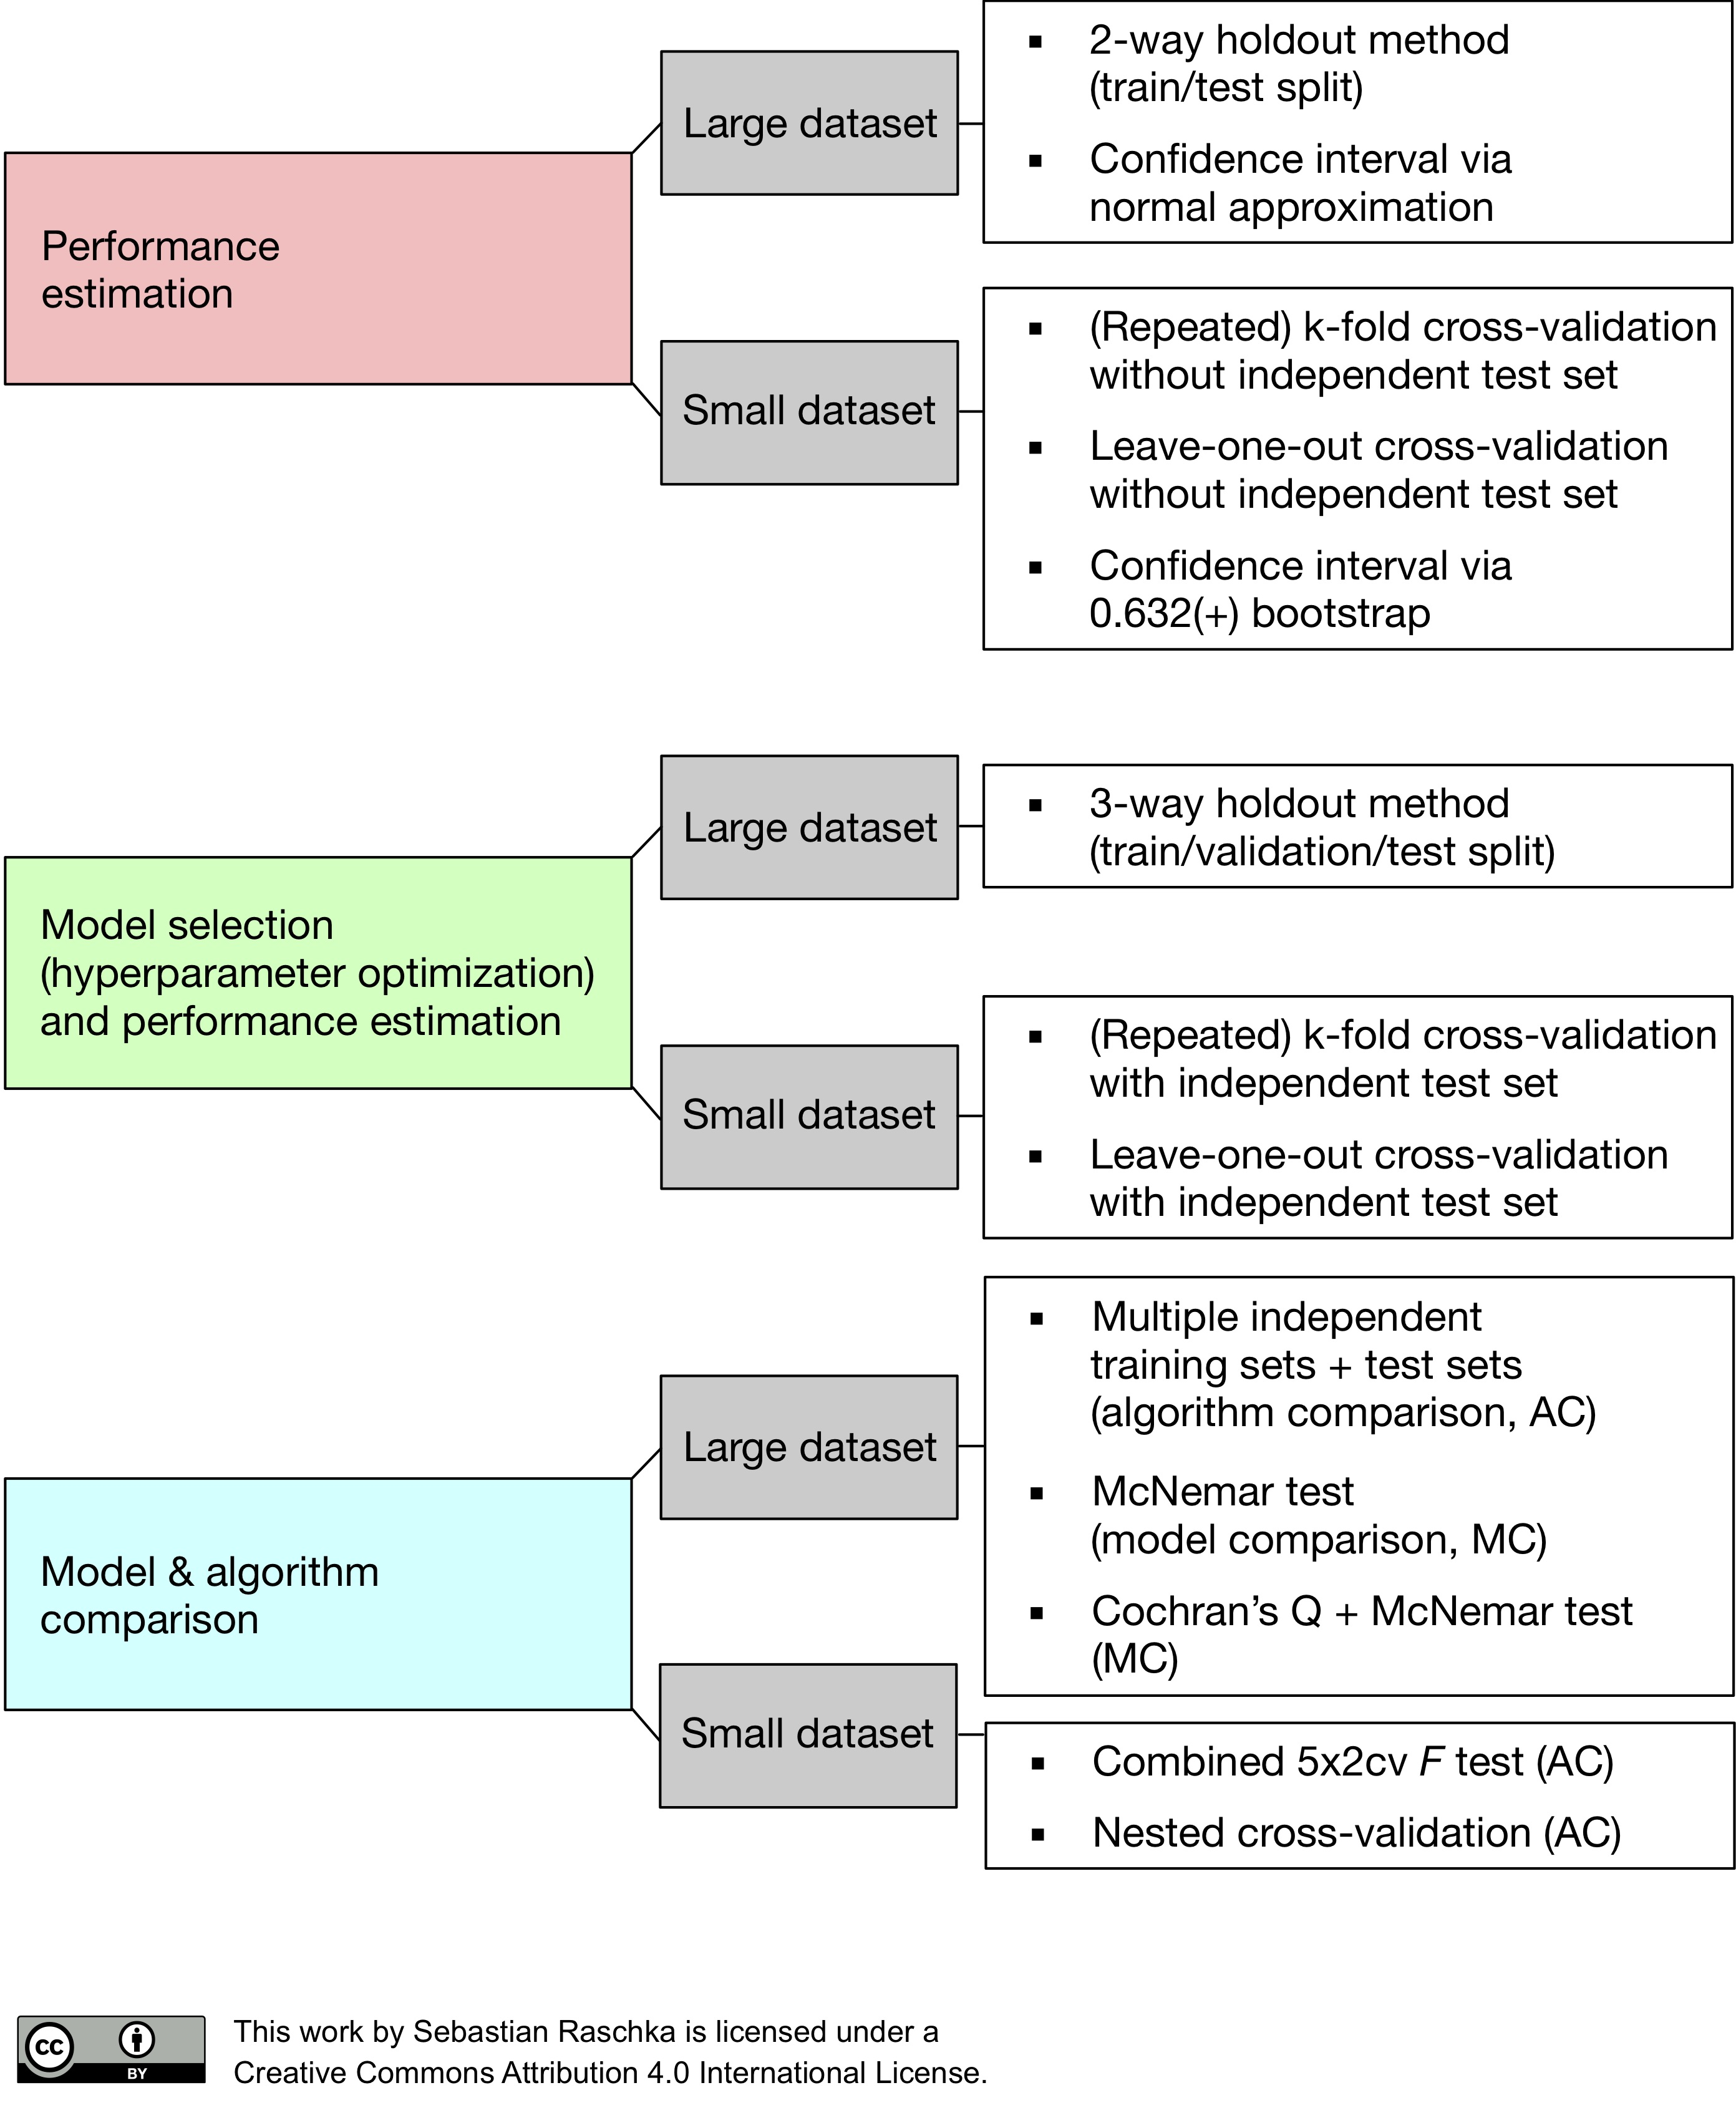  


여러분이 학습 모델을 개발할 때, **모델선택(Model selection)** 을 수행해야 합니다.

이때 **하이퍼파라미터(hyperparameter) 튜닝**을 하게 되는데 튜닝의 효과를 확인하기 위해서 검증세트가 필요합니다. 테스트 세트로 하이퍼파라미터 튜닝을 하면 절대로 안됩니다.

데이터가 많을 경우에는 전체 데이터를 훈련/검증/테스트 세트로 나누면 되지만, 상대적으로 데이터 수가 적을 경우 **K-fold 교차검증(k-fold cross-validation)** 을 진행할 수 있습니다. 물론 이때도 테스트 세트는 미리 떼어 놓아야 합니다.

# 분류(Classification) 문제를 다루어 봅시다

## 분류문제는 회귀문제와 다른 기준으로 기준모델을 설정합니다.

**다수 클래스를 기준모델로 정하는 방법(Majority class baseline) 에 대해 알아 봅시다.**

* 회귀문제에서는 보통 타겟 변수의 평균값을 기준모델로 사용합니다.
* 분류문제에서는 보통 타겟 변수에서 가장 빈번하게 나타나는 범주를 기준모델로 설정합니다.
* 시계열(time-series) 데이터는 보통 어떤 시점을 기준으로 이전 시간의 데이터가 기준모델이 됩니다.


분류문제 에서는 타겟 변수가 편중된 범주비율을 가지는 경우가 많습니다.


* 클래스 1과 0 비율이 9:1인 학습 데이터를 가지고 모델을 만들었는데 모델 예측 정확도가 90% 나왔습니다! 어떻게 이렇게 좋은 성능이 나왔을까요? 이 모델의 성능은 문제가 없는 것 일까요? 불균형한 데이터를 사용해 ML 모델을 만드는데는 상당한 주의가 필요합니다.

    * 이 데이터는 모델이 무조건 클래스 1만 찍도록 만들면 정확도 90%를 달성할 수 있습니다. 그러므로 이런 경우 클래스 1에 대한 정확도가 90% 인 기준모델을 설정하고 더 좋은 성능을 가지는 모델을 만들기 위해 노력해야 합니다.
    
    
### 분류문제를 풀기전에 항상 먼저 타겟 범주가 어떤 비율을 가지고 있는지 확인해 보아야 합니다.